<a href="https://colab.research.google.com/github/rozario-lamperouge/ML-Projects/blob/main/Gold_Prediction/GoldPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/rozario-lamperouge/ML-Projects.git

Cloning into 'ML-Projects'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 29 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (29/29), done.


## **Importing Required Libraries**

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

## **Peeking at the data**

In [4]:
gold_data = pd.read_csv('ML-Projects/Gold_Prediction/gld_price_data.csv')

In [5]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

## **Training the Algorithm**

In [8]:
regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

## **Comparing the Predicted and Original Data**

In [9]:
test_data_prediction = regressor.predict(X_test)

# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9899422800792479


## **Visualizing the Accuracy**

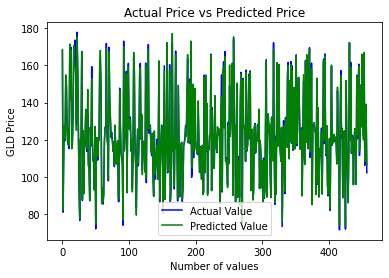

In [11]:
import matplotlib.pyplot as plt

Y_test = list(Y_test)
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')

plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')

plt.legend()
plt.show()